In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [2]:
#import the data
BTC = yf.Ticker("BTC-USD")

In [3]:
data = yf.download("BTC-USD", start="2017-01-01", end="2021-11-29")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Date
2017-01-01     998.325012
2017-01-02    1021.750000
2017-01-03    1043.839966
2017-01-04    1154.729980
2017-01-05    1013.380005
Name: Adj Close, dtype: float64

In [5]:
data.tail()

Date
2021-11-25    57274.679688
2021-11-26    53569.765625
2021-11-27    54815.078125
2021-11-28    57248.457031
2021-11-29    57806.566406
Name: Adj Close, dtype: float64

In [6]:
log_returns = np.log(1 + data.pct_change())

In [7]:
log_returns.tail()

Date
2021-11-25    0.017512
2021-11-26   -0.066874
2021-11-27    0.022980
2021-11-28    0.043435
2021-11-29    0.009702
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

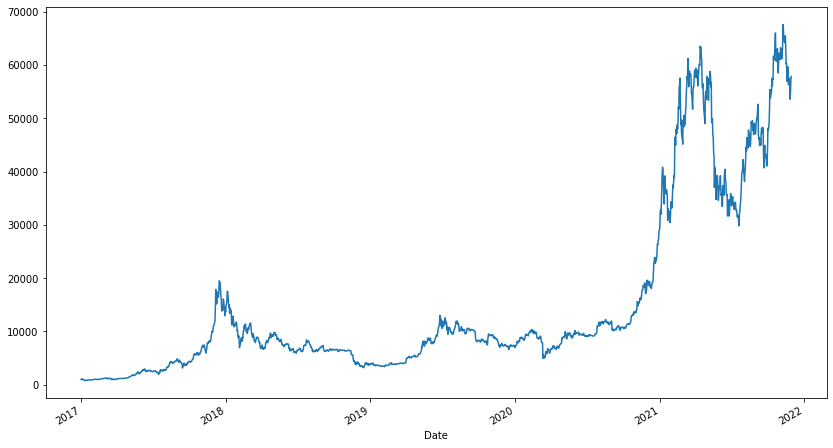

In [8]:
data.plot(figsize=(14,8))

<AxesSubplot:xlabel='Date'>

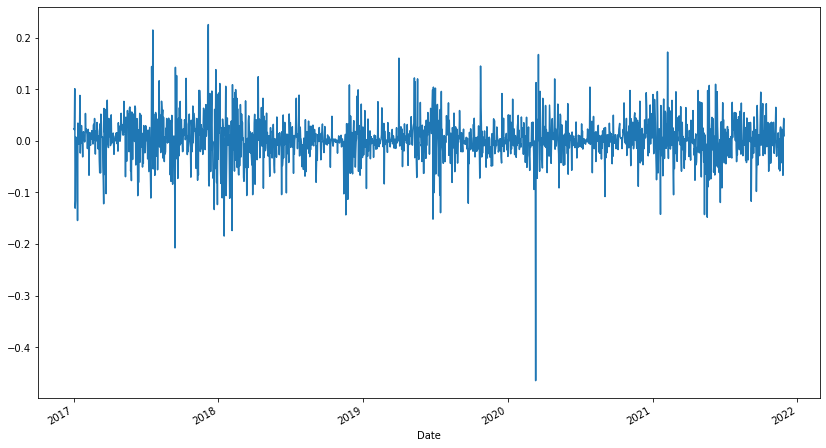

In [9]:
log_returns.plot(figsize=(14,8))

In [10]:
u = log_returns.mean()
u

0.0022687416249433136

In [11]:
var = log_returns.var()
var

0.0018029410257281114

In [12]:
stdev = log_returns.std()
stdev

0.0424610530454452

In [13]:
drift = u - (0.5 * var)
drift

0.001367271112079258

In [14]:
np.array(drift)

array(0.00136727)

In [15]:
np.array(stdev)

array(0.04246105)

In [17]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [18]:
x = np.random.rand(10,2)
x

array([[0.11031364, 0.96984651],
       [0.13239209, 0.62045905],
       [0.7389677 , 0.56156522],
       [0.35984168, 0.72701772],
       [0.05466416, 0.25878565],
       [0.38843237, 0.87528144],
       [0.03554199, 0.27198185],
       [0.13854341, 0.05971253],
       [0.18923031, 0.76980234],
       [0.94578495, 0.87884655]])

In [19]:
norm.ppf(x)

array([[-1.22486184,  1.87854262],
       [-1.11515458,  0.30668663],
       [ 0.64016614,  0.15493881],
       [-0.35888201,  0.60381815],
       [-1.60121942, -0.64709371],
       [-0.28340717,  1.15171766],
       [-1.80494059, -0.60683005],
       [-1.08688683, -1.55719132],
       [-0.88073619,  0.73819604],
       [ 1.60528958,  1.1692401 ]])

In [20]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.41606412, -2.41395387],
       [-0.21946572,  0.23368061],
       [-0.48935097, -0.64325226],
       [ 1.54341711,  0.20531539],
       [-2.81748911,  2.01823418],
       [-0.69514811, -0.05033814],
       [-1.59807094, -0.60207887],
       [-0.0531613 ,  0.0071937 ],
       [ 0.74031925,  0.05966676],
       [ 1.66672663,  1.63638951]])

In [33]:
t_intervals = 100
interations = 5000

In [34]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[1.08822852, 0.98409148, 0.93774989, ..., 0.97717846, 0.97932907,
        1.04127744],
       [1.0072176 , 0.98004168, 1.06248635, ..., 0.98578129, 1.00672712,
        0.93995768],
       [1.03925826, 1.02345572, 1.03153986, ..., 0.94246817, 0.98051752,
        1.00213252],
       ...,
       [1.04037785, 0.95400777, 0.98924663, ..., 0.99392685, 1.03302278,
        1.01390806],
       [1.03560444, 0.97302822, 1.02521955, ..., 1.07988781, 0.96100334,
        0.9742013 ],
       [1.0402602 , 1.18272574, 0.94044272, ..., 1.02352187, 1.05421511,
        1.06139336]])

In [35]:
s_zero = data.iloc[-1]
s_zero

57806.56640625

In [36]:
price_list = np.zeros_like(daily_returns)

In [37]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
price_list[0] = s_zero
price_list

array([[57806.56640625, 57806.56640625, 57806.56640625, ...,
        57806.56640625, 57806.56640625, 57806.56640625],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ]])

In [39]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [40]:
price_list

array([[ 57806.56640625,  57806.56640625,  57806.56640625, ...,
         57806.56640625,  57806.56640625,  57806.56640625],
       [ 58223.79087692,  56652.84447057,  61418.68790365, ...,
         56984.63177208,  58195.43807767,  54335.7263251 ],
       [ 60509.55580909,  57981.67773851,  63355.82458762, ...,
         53706.20157249,  57061.64639596,  54451.59820244],
       ...,
       [113005.77329912, 116858.22637758,  62375.77721733, ...,
         45991.87570167,  64336.29327777, 105595.84263833],
       [117029.28021689, 113706.35224274,  63948.8665377 , ...,
         49666.06584497,  61827.39268737, 102871.60708298],
       [121740.90187321, 134483.42912295,  60140.24604565, ...,
         50834.30460728,  65179.37186757, 109187.24089371]])

 ...]

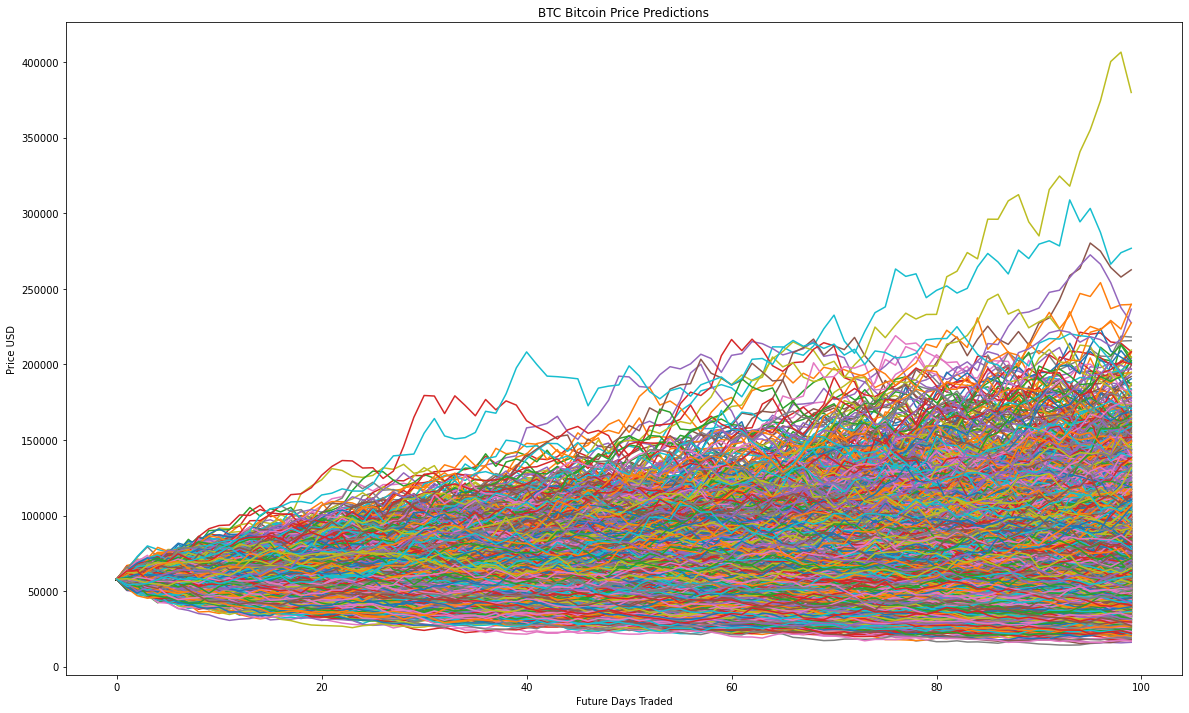

In [43]:
plt.figure(figsize=(20,12))
plt.title('BTC Bitcoin Price Predictions')
plt.xlabel('Future Days Traded')
plt.ylabel('Price USD')
plt.plot(price_list)